In [2]:
pip install wandb

  Using cached wandb-0.18.5-py3-none-win_amd64.whl.metadata (9.7 kB)
  Using cached docker_pycreds-0.4.0-py2.py3-none-any.whl.metadata (1.8 kB)
  Using cached GitPython-3.1.43-py3-none-any.whl.metadata (13 kB)
  Using cached gitdb-4.0.11-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.1-py3-none-any.whl.metadata (4.3 kB)
Using cached wandb-0.18.5-py3-none-win_amd64.whl (15.4 MB)
Using cached docker_pycreds-0.4.0-py2.py3-none-any.whl (9.0 kB)
Using cached GitPython-3.1.43-py3-none-any.whl (207 kB)
   ---------------------------------------- 0.0/317.5 kB ? eta -:--:--
   ----------- ---------------------------- 92.2/317.5 kB 2.6 MB/s eta 0:00:01
   ------------------------------------- -- 297.0/317.5 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 317.5/317.5 kB 3.3 MB/s eta 0:00:00
Using cached gitdb-4.0.11-py3-none-any.whl (62 kB)
Using cached smmap-5.0.1-py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import matplotlib
import pandas as pd 
import wandb
api = wandb.Api()

In [2]:
runs = api.runs("02516-intro-to-dl-in-cv/project2-segmentation")
##
summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })

runs_df.to_csv("project.csv")

In [3]:
#load project csv file
df = pd.read_csv("project.csv")
###
print(df.head())

   Unnamed: 0                                            summary  \
0           0  {'_runtime': 43.604381948, '_step': 79, '_time...   
1           1  {'_runtime': 42.387860382, '_step': 79, '_time...   
2           2  {'_runtime': 34.760532906, '_step': 39, '_time...   
3           3  {'_runtime': 7.469073281, '_step': 39, '_times...   
4           4  {'_runtime': 35.011803828, '_step': 19, '_time...   

                                              config                name  
0  {'epochs': 20, 'dataset': 'PH2', 'loss_fn': 'B...  generous-thunder-1  
1  {'epochs': 20, 'dataset': 'PH2', 'loss_fn': 'B...       kind-cherry-2  
2  {'epochs': 20, 'dataset': 'PH2', 'loss_fn': 'B...        cool-brook-3  
3  {'epochs': 20, 'dataset': 'DRIVE', 'loss_fn': ...        zesty-surf-4  
4  {'epochs': 20, 'dataset': 'PH2', 'loss_fn': 'B...       amber-music-5  


In [4]:
# Load the CSV file
df = pd.read_csv("project.csv")
# Drop the Unnamed column if it's just an index
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
# Expand the 'summary' and 'config' JSON-like columns into individual columns
summary_df = pd.json_normalize(df['summary'].apply(eval))
config_df = pd.json_normalize(df['config'].apply(eval))
# Concatenate expanded columns with the original DataFrame, excluding the original 'summary' and 'config' columns
df_expanded = pd.concat([df.drop(['summary', 'config'], axis=1), summary_df, config_df], axis=1)
# Display the expanded DataFrame for readability
print(df_expanded.head())
# Optionally, save to a new CSV file
df_expanded.to_csv("all_runs_expanded.csv", index=False)

                 name   _runtime  _step    _timestamp train_loss  val_loss  \
0  generous-thunder-1  43.604382   79.0  1.729451e+09   0.407366  0.407601   
1       kind-cherry-2  42.387860   79.0  1.729451e+09   0.415236  0.408828   
2        cool-brook-3  34.760533   39.0  1.729451e+09   0.179681  0.295538   
3        zesty-surf-4   7.469073   39.0  1.729451e+09   0.418857  0.402614   
4       amber-music-5  35.011804   19.0  1.729452e+09   0.238921   0.31273   

   _wandb.runtime  epoch  PH2/IoU  PH2/accuracy  ...  jobid  model  device  \
0            44.0    NaN      NaN           NaN  ...    NaN    NaN     NaN   
1            43.0    NaN      NaN           NaN  ...    NaN    NaN     NaN   
2            34.0    NaN      NaN           NaN  ...    NaN    NaN     NaN   
3             7.0    NaN      NaN           NaN  ...    NaN    NaN     NaN   
4            35.0    NaN      NaN           NaN  ...    NaN    NaN     NaN   

   resize  crop_size  visualize  batch_size  sampling  weak  s

In [5]:

# print the expanded df and loade it 
df = pd.read_csv("all_runs_expanded.csv")

print(df)
##
### filter out only value of epoch == 1500.0 and not equal to nan 
# and in train_loss it does not contain any nan
#df_filter = df[(df['epoch'] == 1500.0) & (df['train_loss'].notnull())]
##

# select only weak = true and train_loss not nan 
df_filter = df[(df['weak'] == True) & (df['train_loss'].notnull())]

print(df_filter)
#print(df_filter.columns)

# print based on epochs 
print(df_filter['epochs'])

# filter them now if epochs is 1500
# Save the filtered DataFrame to a new CSV file
# filteresd 
#df_filter.to_csv("all_runs_filtered.csv", index=False)
df_filter_1500 = df_filter[df_filter['epochs'] == 1500]

print(df_filter_1500)



# drop if num_clicks not equal 5 or 15 
df_filtered_2 = df_filter_1500[(df_filter_1500['num_clicks'] == 5) | (df_filter_1500['num_clicks'] == 15)]
print(df_filtered_2)


# export the filtered data to a new csv file
df_filtered_2.to_csv("all_runs_filtered_weak.csv", index=False)

# drop row if device = cpu 
df_filtered_3 = df_filtered_2[df_filtered_2['device'] != 'cpu']
print(df_filtered_3)

                    name      _runtime   _step    _timestamp  train_loss  \
0     generous-thunder-1     43.604382    79.0  1.729451e+09    0.407366   
1          kind-cherry-2     42.387860    79.0  1.729451e+09    0.415236   
2           cool-brook-3     34.760533    39.0  1.729451e+09    0.179681   
3           zesty-surf-4      7.469073    39.0  1.729451e+09    0.418857   
4          amber-music-5     35.011804    19.0  1.729452e+09    0.238921   
...                  ...           ...     ...           ...         ...   
1039            22965695  12146.444153    26.0  1.730220e+09    0.318793   
1040            22965706  13757.126200  1502.0  1.730222e+09    0.018502   
1041            22966258  27199.785775  1502.0  1.730238e+09    0.020227   
1042            22967308  14419.984753  1502.0  1.730235e+09    0.025222   
1043            22967363  19061.353541  1502.0  1.730240e+09    0.050799   

      val_loss  _wandb.runtime  epoch  PH2/IoU  PH2/accuracy  ...     jobid  \
0     0.

C:\Users\Petrb\AppData\Local\Temp\ipykernel_38304\779648997.py:4: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  print(df)


In [6]:
print(df_filtered_3)

          name      _runtime   _step    _timestamp  train_loss  val_loss  \
986   22959318  12625.885123  1499.0  1.730171e+09    0.044194  0.223146   
992   22959319  12041.777806  1499.0  1.730183e+09    0.042887  0.072679   
1001  22959323    321.404243    24.0  1.730192e+09    0.265730  0.266853   
1011  22961908  12158.529519  1502.0  1.730205e+09    0.012092  0.489023   
1013  22961954  11879.166881  1502.0  1.730205e+09    0.023920  0.257340   
1015  22963975  12677.883778  1502.0  1.730207e+09    0.022622  0.457599   
1024  22964191  13443.891549  1502.0  1.730210e+09    0.033324  0.377143   
1025  22964192  13039.052001  1502.0  1.730210e+09    0.041765  0.280257   
1032  22964673  18140.678726  1502.0  1.730218e+09    0.026482  0.290187   
1033  22964674  13470.911690  1502.0  1.730214e+09    0.030189  0.251804   
1037  22965116  12465.806370  1502.0  1.730217e+09    0.017478  0.130330   
1038  22965698  25847.298000  1502.0  1.730233e+09    0.021515  0.213503   
1040  229657

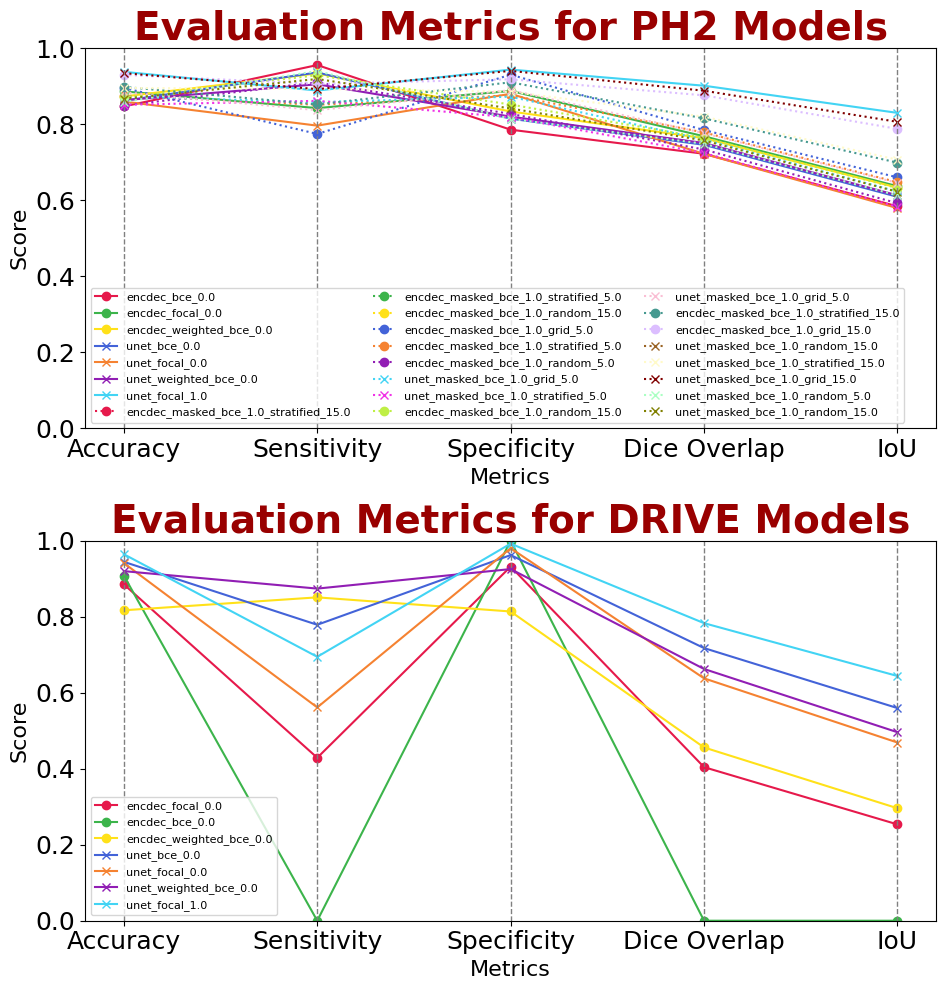

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Load the dataset
ph2_path = "ph2_data_filtered.csv"
drive_path = "drive_data_filtered.csv"
ph2_weak_path = "all_runs_filtered_weak.csv"

ph2_data = pd.read_csv(ph2_path)
drive_data = pd.read_csv(drive_path)
ph2_weak_data = pd.read_csv(ph2_weak_path)

ph2_data = pd.concat([ph2_data, ph2_weak_data])

# Define metrics
ph2_metrics = ['test/PH2/accuracy', 'test/PH2/sensitivity', 'test/PH2/specificity', 
               'test/PH2/dice_overlap', 'test/PH2/IoU']
drive_metrics = ['test/DRIVE/accuracy', 'test/DRIVE/sensitivity', 'test/DRIVE/specificity', 
                 'test/DRIVE/dice_overlap', 'test/DRIVE/IoU']

# Predefined color array
colors = ['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6', '#bfef45', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#a9a9a9', '#000000']

# Create a figure for the plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Function to plot line graphs for each row
def plot_lines(data, metrics, ax, title):
    for index, row in data.iterrows():
        # Extract values for the metrics
        metric_values = row[metrics].values
        
        # Construct the legend label
        if row['weak']:
            legend_label = f"{row['model']}_{row['loss_fn']}_{row['padding']}_{row['sampling_strategy']}_{row['num_clicks']}"
        else:
            legend_label = f"{row['model']}_{row['loss_fn']}_{row['padding']}"
        
        # Determine line style, color, and marker based on 'weak' status and model
        line_style = 'dotted' if row['weak'] else 'solid'
        color = colors[index % len(colors)]  # Cycle through the color array
        
        # Set marker based on model type
        if "unet" in row['model']:
            marker = 'x'  # X marker for UNet
        elif "encdec" in row['model']:
            marker = 'o'  # Circle marker for Encoder-Decoder
        else:
            marker = 's'  # Square marker for others
        
        # Plot the line for this row
        ax.plot(metrics, metric_values, marker=marker, label=legend_label, linestyle=line_style, color=color)

    # Add vertical lines (for example, at each metric position)
    for i in range(len(metrics)):
        ax.axvline(x=i, color='gray', linestyle='--', linewidth=1)  # Customize the line style, color, and width
    
    # Set y-axis limits and font size
    ax.set_ylim(0, 1)
    ax.set_xticks(range(len(metrics)))
    ax.set_xticklabels(['Accuracy', 'Sensitivity', 'Specificity', 'Dice Overlap', 'IoU'], fontsize=18)
    
    # Adjust y-axis font size
    ax.tick_params(axis='y', labelsize=18)
    ax.set_xlabel('Metrics', fontsize=16)
    ax.set_ylabel('Score', fontsize=16)

    
    # Adjust the number of legend columns dynamically if there are too many entries
    ncol = 3 if len(data) > 10 else 1
    ax.legend(loc="lower left", fontsize=8, ncol=ncol)  # Adjust legend position
    
    # Set the title with a specific color and bold font
    ax.set_title(title, color='#990000', fontweight='bold', fontsize=28)

# PH2 subplot
plot_lines(ph2_data, ph2_metrics, ax1, 'Evaluation Metrics for PH2 Models')

# DRIVE subplot
plot_lines(drive_data, drive_metrics, ax2, 'Evaluation Metrics for DRIVE Models')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig("eval_metrics.svg", dpi=600)

plt.show()